## Unit 6.4 : Least Squares Approximations

data pairs:

$ x_1 \to y_1 \\ x_2 \to y_2 \\ \vdots $

想找到一條線 $ y = a_0 + a_1 x $ 使得所有錯誤, 實際點距離線的距離 = error = $ | y_i - (a_0 + a_1 x_i) | $ 的平方和最小。

minimize $ E = [y_1 - (a_0 + a_1 x_1) ]^2 + [y_2 - (a_0 + a_1 x_2) ]^2 + \cdots + [y_n - (a_0 + a_1 x_n) ]^2 $

定義一個 Error Vector : $ \vec{e} = \begin{bmatrix} y_1 - (a_0 + a_1 x_1) \\ y_2 - (a_0 + a_1 x_2) \\ \vdots \\ y_n - (a_0 + a_1 x_n) \end{bmatrix} $

$ E = \lVert e \rVert^2 $

$ \vec{e} = \vec{y} - a_0 \vec{v}_1 - a_1 \vec{v}_2 = \vec{y} - C \vec{a} $, where

$ \vec{y} \triangleq \begin{bmatrix} y_1\\y_2\\ \vdots \\ y_n \end{bmatrix} $  
$ C \triangleq \begin{bmatrix} \vec{v}_1 & \vec{v}_2 \end{bmatrix} $
$ = \begin{bmatrix} 1 & x_1 \\ 1 & x_2 \\ \vdots \\ 1 & x_n \end{bmatrix} $ , 
$ \vec{a} = \begin{bmatrix} a_0\\a_1 \end{bmatrix} $

要最小化 $ \lVert \vec{y} - C \vec{a} \rVert^2 $, 亦即要最小化 y向量 投影到 由C矩陣的 Columns 所 span 出來的 subspace 上的投影。

$ C \vec{a} $ 是由 Columns of C 線性組合出的 subspace, 組合係數是 $ \vec{a} $, 亦即 C 的 Column Space

y 若不在 Columns Space of C上，那麼投影在上面的最短向量 Ca, 組合係數 (a0, a1) 是什麼?

Define W = Col C,

$ C \vec{a} = U_W(\vec{y}) = P_W $

$ \begin{bmatrix} a_0 \\ a_1 \end{bmatrix} $
$ = \Big ( C^T C \Big )^{-1} C^T \ \ \vec{y} $ = ( 0.056, 0.745 )

RESULT: y = 0.056 + 0.745 x

result [a0, a1] = 
[[ 0.0555418 ]
 [ 0.74458204]]

Pw = 
[[ 17.6501548   -7.27863777 -13.51083591   3.10835913   1.03095975]
 [ -6.50154799   2.78637771   5.10835913  -1.08359133  -0.30959752]]


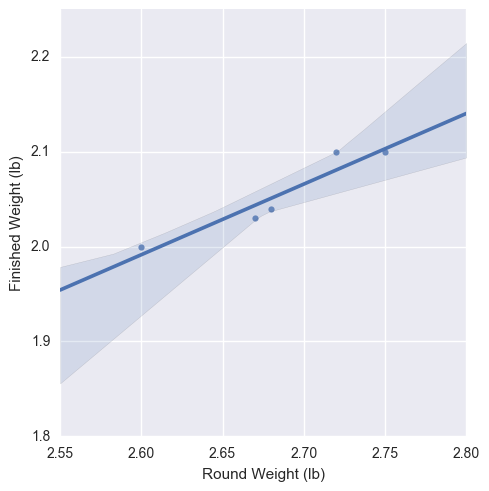

In [2]:
%matplotlib inline
import numpy as np, seaborn as sns, pandas as pd, numpy.linalg as la
from matplotlib import patches, pyplot as plt

x = np.array([2.6, 2.72, 2.75, 2.67, 2.68])
y = np.array([2.0, 2.1,  2.1,  2.03, 2.04])
x_lbl, y_lbl = 'Round Weight (lb)', 'Finished Weight (lb)'
d = {x_lbl: x, y_lbl: y }
data = pd.DataFrame(data=d)

data[x_lbl]
dfC = pd.DataFrame(data=data, columns=[x_lbl, y_lbl])
dfC['x0'] = 1
C =dfC.as_matrix(columns=['x0', x_lbl])
u = dfC.as_matrix(columns=[y_lbl])
Pw = la.inv(C.T.dot(C)).dot(C.T)
a = Pw.dot(u)

print('result [a0, a1] = \n%s\n' % a)
print('Pw = \n%s' % Pw)
g = sns.lmplot(x=x_lbl, y=y_lbl, data=data)

### Best Quadratic fit:

using a quadratic polynomial $ y = a_0 + a_1 x + a_2 x^2 $,   
such that minimize the error $ E = \Big [y_1 - ( a_0 + a_1 x_1 + a_2 x_1^2 ) \Big ]^2 + \Big [y_2 - ( a_0 + a_1 x_2 + a_2 x_2^2 ) \Big ]^2 + \cdots $

$ C \triangleq \begin{bmatrix} \vec{v}_1 & \vec{v}_2 & \vec{v}_3 \end{bmatrix} $
$ = \begin{bmatrix} 1 & x_1 & x_1^2 \\ 1 & x_2 & c_2^2 \\ \vdots \\ 1 & x_n & x_n^2 \end{bmatrix} $ , 
$ \vec{a} = \begin{bmatrix} a_0\\a_1\\a_2 \end{bmatrix} $

result [a0, a1] = 
[[ 101.00237906]
 [  29.76605868]
 [ -16.10626487]]

Pw = 
[[ 0.92109437  0.20459952 -0.129659   -0.08168121  0.08564631]
 [-0.90761301  0.38104679  0.74980174  0.19865186 -0.42188739]
 [ 0.19111816 -0.13877875 -0.20856463 -0.01823949  0.17446471]]


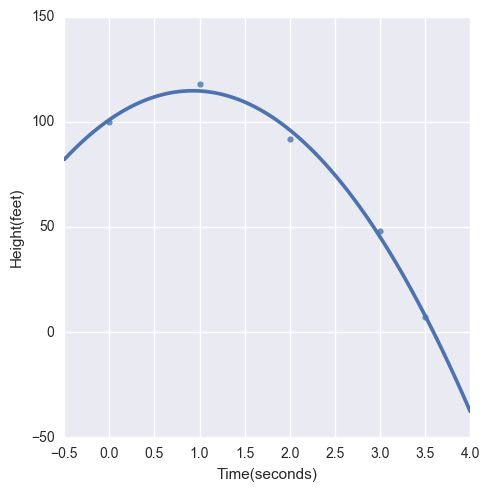

In [3]:
%matplotlib inline
import numpy as np, seaborn as sns, pandas as pd, numpy.linalg as la
from matplotlib import patches, pyplot as plt

x = np.array([0,     1,  2,  3, 3.5])
y = np.array([100, 118, 92, 48, 7])
x_lbl, y_lbl = 'Time(seconds)', 'Height(feet)'
data = pd.DataFrame(data={x_lbl: x, y_lbl: y })

dfC = pd.DataFrame(data=data, columns=[x_lbl, y_lbl])
dfC['x0'] = 1
dfC['x2'] = dfC[x_lbl]**2
C =dfC.as_matrix(columns=['x0', x_lbl, 'x2'])
u = dfC.as_matrix(columns=[y_lbl])
Pw = la.inv(C.T.dot(C)).dot(C.T)
a = Pw.dot(u)

print('result [a0, a1] = \n%s\n' % a)
print('Pw = \n%s' % Pw)
g = sns.lmplot(x=x_lbl, y=y_lbl, data=data, order=2, ci=None)